In [56]:
import numpy as np
import matplotlib.pyplot as plt
from covariates_gclass import *
from scipy.stats import norm
from tqdm import tqdm

import seaborn as sns
sns.set()

In [102]:
Y0 = -1
Y1 = 1
h=0.05
M=100

xs = np.arange(-4, 4 + h, step=h)
losses = np.zeros(len(xs))
truth_0 = np.zeros((len(xs), M))
predictions_0 = np.zeros((len(xs), M))
class_1_count_0 = np.zeros(len(xs))

for i, x in enumerate(tqdm(xs)):
    pdf_x0 = norm.pdf(x, Y0, 1)
    pdf_x1 = norm.pdf(x, Y1, 1)
    
    for j in range(M):
        truth_0[i, j] = np.random.choice([Y0, Y1], 1)
        
        Z = np.random.normal(truth_0[i, j], 1, 1)
        
        pdf_z0 = norm.pdf(Z, 0*Y0, 1)
        pdf_z1 = norm.pdf(Z, 0*Y1, 1)
        
        if pdf_x0 * pdf_z0 > pdf_x1 * pdf_z1:
            predictions_0[i, j] = -1
        else:
            predictions_0[i, j] = 1
            class_1_count_0[i] += 1



  0%|          | 0/161 [00:00<?, ?it/s]

  4%|▎         | 6/161 [00:00<00:02, 57.54it/s]

  7%|▋         | 12/161 [00:00<00:02, 57.36it/s]

 11%|█         | 18/161 [00:00<00:02, 57.27it/s]

 15%|█▍        | 24/161 [00:00<00:02, 57.28it/s]

 19%|█▊        | 30/161 [00:00<00:02, 57.23it/s]

 22%|██▏       | 36/161 [00:00<00:02, 57.14it/s]

 26%|██▌       | 42/161 [00:00<00:02, 57.14it/s]

 30%|██▉       | 48/161 [00:00<00:01, 57.03it/s]

 34%|███▎      | 54/161 [00:00<00:01, 57.12it/s]

 37%|███▋      | 60/161 [00:01<00:01, 57.14it/s]

 41%|████      | 66/161 [00:01<00:01, 57.14it/s]

 45%|████▍     | 72/161 [00:01<00:01, 57.07it/s]

 48%|████▊     | 78/161 [00:01<00:01, 57.13it/s]

 52%|█████▏    | 84/161 [00:01<00:01, 57.01it/s]

 56%|█████▌    | 90/161 [00:01<00:01, 56.92it/s]

 60%|█████▉    | 96/161 [00:01<00:01, 56.81it/s]

 63%|██████▎   | 102/161 [00:01<00:01, 55.71it/s]

 67%|██████▋   | 108/161 [00:01<00:00, 55.24it/s]

 71%|███████   | 114/161 [00:02<00:00, 54.91it/s]

 75%|

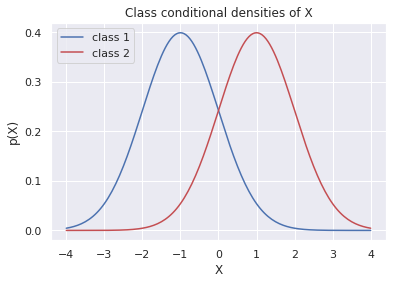

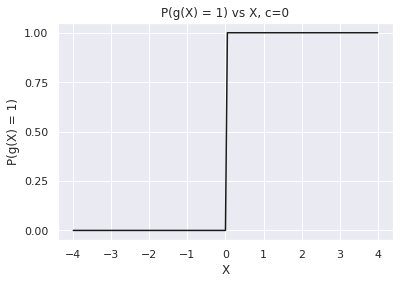

In [103]:

fig, ax = plt.subplots(1,1)
ax.plot(xs, norm.pdf(xs, Y0, 1), c = 'b', label='class 1')
ax.plot(xs, norm.pdf(xs, Y1, 1), c = 'r', label='class 2')
ax.set_xlabel('X')
ax.set_ylabel('p(X)')
ax.legend(loc='upper left')
plt.locator_params(axis='y', nbins=5)
plt.savefig('true_densities_X.png')

# ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

fig, ax2 = plt.subplots(1,1)

ax2.set_ylabel('P(g(X) = 1)')  # we already handled the x-label with ax1
ax2.plot(xs, class_1_count_0/M, c='k')
ax.set_title('Class conditional densities of X')
ax2.set_title('P(g(X) = 1) vs X, c=0')
ax2.set_xlabel('X')

plt.locator_params(axis='y', nbins=5)
plt.style.use('seaborn-deep')

plt.savefig('conditional_classification_c0.png')

In [92]:
Y0 = -1
Y1 = 1
h=0.1
M=5000

xs = np.arange(-4, 4 + h, step=h)
losses = np.zeros(len(xs))
truth_05 = np.zeros((len(xs), M))
predictions_05 = np.zeros((len(xs), M))
class_1_count_05 = np.zeros(len(xs))

for i, x in enumerate(tqdm(xs)):
    pdf_x0 = norm.pdf(x, Y0, 1)
    pdf_x1 = norm.pdf(x, Y1, 1)
    
    for j in range(M):
        truth_05[i, j] = np.random.choice([Y0, Y1], 1)
        
        Z = np.random.normal(truth_05[i, j], 1, 1)
        
        pdf_z0 = norm.pdf(Z, 0.5*Y0, 1)
        pdf_z1 = norm.pdf(Z, 0.5*Y1, 1)
        
        if pdf_x0 * pdf_z0 > pdf_x1 * pdf_z1:
            predictions_05[i, j] = -1
        else:
            predictions_05[i, j] = 1
            class_1_count_05[i] += 1



  0%|          | 0/81 [00:00<?, ?it/s]

  1%|          | 1/81 [00:00<01:07,  1.19it/s]

  2%|▏         | 2/81 [00:01<01:06,  1.19it/s]

  4%|▎         | 3/81 [00:02<01:05,  1.19it/s]

  5%|▍         | 4/81 [00:03<01:05,  1.17it/s]

  6%|▌         | 5/81 [00:04<01:05,  1.16it/s]

  7%|▋         | 6/81 [00:05<01:04,  1.16it/s]

  9%|▊         | 7/81 [00:06<01:04,  1.15it/s]

 10%|▉         | 8/81 [00:06<01:03,  1.15it/s]

 11%|█         | 9/81 [00:07<01:02,  1.15it/s]

 12%|█▏        | 10/81 [00:08<01:01,  1.16it/s]

 14%|█▎        | 11/81 [00:09<01:00,  1.16it/s]

 15%|█▍        | 12/81 [00:10<01:00,  1.15it/s]

 16%|█▌        | 13/81 [00:11<00:59,  1.14it/s]

 17%|█▋        | 14/81 [00:12<00:58,  1.14it/s]

 19%|█▊        | 15/81 [00:13<00:57,  1.14it/s]

 20%|█▉        | 16/81 [00:13<00:56,  1.14it/s]

 21%|██        | 17/81 [00:14<00:55,  1.15it/s]

 22%|██▏       | 18/81 [00:15<00:55,  1.14it/s]

 23%|██▎       | 19/81 [00:16<00:54,  1.14it/s]

 25%|██▍       | 20/81 [00:17<00:53,

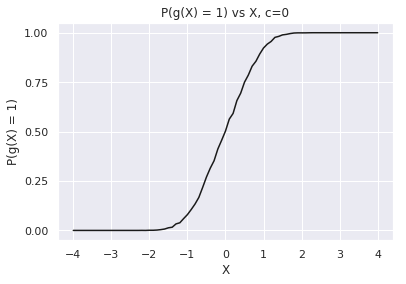

In [94]:
fig, ax2 = plt.subplots(1,1)

ax2.set_ylabel('P(g(X) = 1)')  # we already handled the x-label with ax1
ax2.plot(xs, class_1_count_05/M, c='k')
ax.set_title('Class conditional densities of X')
ax2.set_title('P(g(X) = 1) vs X, c=0')
ax2.set_xlabel('X')

plt.locator_params(axis='y', nbins=5)
plt.style.use('seaborn-deep')

plt.savefig('conditional_classification_c05.png')

In [95]:
Y0 = -1
Y1 = 1
h=0.1
M=5000

xs = np.arange(-4, 4 + h, step=h)
losses = np.zeros(len(xs))
truth_1 = np.zeros((len(xs), M))
predictions_1 = np.zeros((len(xs), M))
class_1_count_1 = np.zeros(len(xs))

for i, x in enumerate(tqdm(xs)):
    pdf_x0 = norm.pdf(x, Y0, 1)
    pdf_x1 = norm.pdf(x, Y1, 1)
    
    for j in range(M):
        truth_1[i, j] = np.random.choice([Y0, Y1], 1)
        
        Z = np.random.normal(truth_1[i, j], 1, 1)
        
        pdf_z0 = norm.pdf(Z, Y0, 1)
        pdf_z1 = norm.pdf(Z, Y1, 1)
        
        if pdf_x0 * pdf_z0 > pdf_x1 * pdf_z1:
            predictions_1[i, j] = -1
        else:
            predictions_1[i, j] = 1
            class_1_count_1[i] += 1



  0%|          | 0/81 [00:00<?, ?it/s]

  1%|          | 1/81 [00:00<01:06,  1.21it/s]

  2%|▏         | 2/81 [00:01<01:05,  1.20it/s]

  4%|▎         | 3/81 [00:02<01:05,  1.19it/s]

  5%|▍         | 4/81 [00:03<01:05,  1.18it/s]

  6%|▌         | 5/81 [00:04<01:04,  1.17it/s]

  7%|▋         | 6/81 [00:05<01:04,  1.17it/s]

  9%|▊         | 7/81 [00:05<01:03,  1.16it/s]

 10%|▉         | 8/81 [00:06<01:03,  1.15it/s]

 11%|█         | 9/81 [00:07<01:02,  1.15it/s]

 12%|█▏        | 10/81 [00:08<01:01,  1.16it/s]

 14%|█▎        | 11/81 [00:09<01:00,  1.16it/s]

 15%|█▍        | 12/81 [00:10<00:58,  1.17it/s]

 16%|█▌        | 13/81 [00:11<00:58,  1.17it/s]

 17%|█▋        | 14/81 [00:12<00:57,  1.16it/s]

 19%|█▊        | 15/81 [00:12<00:57,  1.15it/s]

 20%|█▉        | 16/81 [00:13<00:56,  1.16it/s]

 21%|██        | 17/81 [00:14<00:54,  1.17it/s]

 22%|██▏       | 18/81 [00:15<00:54,  1.16it/s]

 23%|██▎       | 19/81 [00:16<00:53,  1.15it/s]

 25%|██▍       | 20/81 [00:17<00:52,

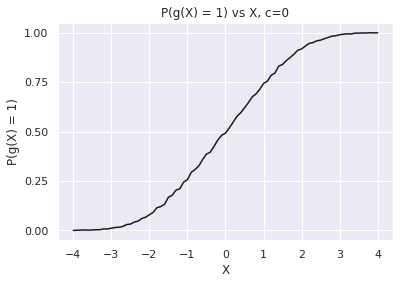

In [97]:
fig, ax2 = plt.subplots(1,1)

ax2.set_ylabel('P(g(X) = 1)')  # we already handled the x-label with ax1
ax2.plot(xs, class_1_count_1/M, c='k')
ax.set_title('Class conditional densities of X')
ax2.set_title('P(g(X) = 1) vs X, c=0')
ax2.set_xlabel('X')

plt.locator_params(axis='y', nbins=5)
plt.style.use('seaborn-deep')

plt.savefig('conditional_classification_c1.png')

In [98]:
Y0 = -1
Y1 = 1
h=0.1
M=5000

xs = np.arange(-4, 4 + h, step=h)
losses = np.zeros(len(xs))
truth_2 = np.zeros((len(xs), M))
predictions_2 = np.zeros((len(xs), M))
class_1_count_2 = np.zeros(len(xs))

for i, x in enumerate(tqdm(xs)):
    pdf_x0 = norm.pdf(x, Y0, 1)
    pdf_x1 = norm.pdf(x, Y1, 1)
    
    for j in range(M):
        truth_2[i, j] = np.random.choice([Y0, Y1], 1)
        
        Z = np.random.normal(truth_2[i, j], 1, 1)
        
        pdf_z0 = norm.pdf(Z, 2*Y0, 1)
        pdf_z1 = norm.pdf(Z, 2*Y1, 1)
        
        if pdf_x0 * pdf_z0 > pdf_x1 * pdf_z1:
            predictions_2[i, j] = -1
        else:
            predictions_2[i, j] = 1
            class_1_count_2[i] += 1



  0%|          | 0/81 [00:00<?, ?it/s]

  1%|          | 1/81 [00:00<01:10,  1.14it/s]

  2%|▏         | 2/81 [00:01<01:09,  1.14it/s]

  4%|▎         | 3/81 [00:02<01:08,  1.14it/s]

  5%|▍         | 4/81 [00:03<01:07,  1.15it/s]

  6%|▌         | 5/81 [00:04<01:06,  1.15it/s]

  7%|▋         | 6/81 [00:05<01:05,  1.15it/s]

  9%|▊         | 7/81 [00:06<01:04,  1.14it/s]

 10%|▉         | 8/81 [00:06<01:03,  1.14it/s]

 11%|█         | 9/81 [00:07<01:03,  1.14it/s]

 12%|█▏        | 10/81 [00:08<01:02,  1.14it/s]

 14%|█▎        | 11/81 [00:09<01:01,  1.15it/s]

 15%|█▍        | 12/81 [00:10<01:00,  1.14it/s]

 16%|█▌        | 13/81 [00:11<00:59,  1.14it/s]

 17%|█▋        | 14/81 [00:12<00:59,  1.13it/s]

 19%|█▊        | 15/81 [00:13<00:58,  1.13it/s]

 20%|█▉        | 16/81 [00:14<00:57,  1.14it/s]

 21%|██        | 17/81 [00:14<00:56,  1.14it/s]

 22%|██▏       | 18/81 [00:15<00:55,  1.14it/s]

 23%|██▎       | 19/81 [00:16<00:54,  1.14it/s]

 25%|██▍       | 20/81 [00:17<00:53,

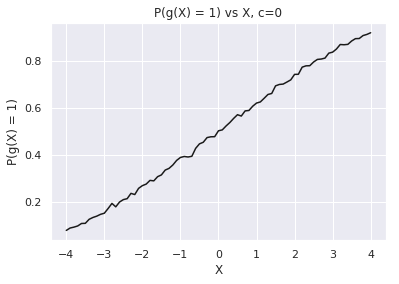

In [100]:
fig, ax2 = plt.subplots(1,1)

ax2.set_ylabel('P(g(X) = 1)')  # we already handled the x-label with ax1
ax2.plot(xs, class_1_count_2/M, c='k')
ax.set_title('Class conditional densities of X')
ax2.set_title('P(g(X) = 1) vs X, c=0')
ax2.set_xlabel('X')

plt.locator_params(axis='y', nbins=5)
plt.style.use('seaborn-deep')

plt.savefig('conditional_classification_c2.png')